In [1]:
import numpy as np
import pandas as pd 
import torch.nn as nn
import torch

In [2]:
import matplotlib.pyplot as plt 
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('png')

In [3]:
data = pd.read_excel('./2_data.xlsx').values
data.shape

/var/folders/6s/jttrjjc92qj8wflfcb45sxlw0000gn/T/ipykernel_55692/2347927648.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  data = pd.read_excel('./2_data.xlsx').values


(357, 13)

In [4]:
train_set, test_set = data[:int(0.8*len(data))], data[int(0.8*len(data)):]
train_set.shape, test_set.shape

((285, 13), (72, 13))

In [5]:
x_train, y_train = train_set[:, :-1], train_set[:, -1]
x_test, y_test = test_set[:, :-1], test_set[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((285, 12), (285,), (72, 12), (72,))

In [6]:
from sklearn import preprocessing
x_train, x_test = preprocessing.StandardScaler().fit_transform(x_train), preprocessing.StandardScaler().fit_transform(x_test)

In [7]:
class ClssificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(12, 8)
        self.hidden2 = nn.Linear(8, 6)
        self.out = nn.Linear(6, 4)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.out(x)
        return x
    
model = ClssificationModel()
        

In [8]:
batch_size = 32
epochs = 1000
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
# Convert data to tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long) - 1
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long) - 1



In [19]:
# Training
losses = []
for epoch in range(epochs):
    for i in range(0, len(x_train_tensor), batch_size):
        x_batch = x_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]

        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 1.4418929815292358
Epoch: 100, Loss: 0.1490626335144043
Epoch: 200, Loss: 0.0686144158244133
Epoch: 300, Loss: 0.03580133616924286
Epoch: 400, Loss: 0.02102643996477127
Epoch: 500, Loss: 0.013822735287249088
Epoch: 600, Loss: 0.009995156899094582
Epoch: 700, Loss: 0.007606104481965303
Epoch: 800, Loss: 0.005522900726646185
Epoch: 900, Loss: 0.004057327285408974


In [ ]:
# Testing
with torch.no_grad():
    y_pred = model(x_test_tensor)
    loss = loss_fn(y_pred, y_test_tensor)
    print(f'Loss: {loss.item()}')

    y_pred = torch.argmax(y_pred, dim=1)
    accuracy = (y_pred == y_test_tensor).sum() / len(y_test_tensor)
    print(f'Accuracy: {accuracy}')

Loss: 0.03999703750014305
Accuracy: 0.9861111044883728


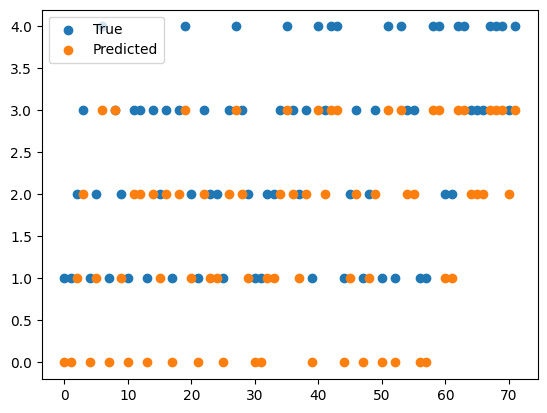

In [ ]:
# Plotting
plt.scatter(range(len(y_test)), y_test, label='True')
plt.scatter(range(len(y_test)), y_pred, label='Predicted')
plt.legend()
plt.show()